## Trendet e blerjeve të konsumatorëve 
Kjo analizë eksploron dhe analizon tendencat e blerjeve të klientëve duke përdorur një grup të dhënash. Analiza ofron njohuri mbi sjelljen e konsumatorëve dhe modelet e blerjeve duke përfshirë detaje të tilla si mosha, gjinia, historiku i blerjeve, mënyrat e preferuara të pagesës dhe shpeshtësia e blerjeve.

### Libraritë e përdorura

In [3]:
import pandas as pd
import seaborn as sns

### Leximi i dataset-it

In [46]:
df=pd.read_csv("../Shopping_Trends_Dataset.csv")

### Kualiteti i të dhënave 

- Struktura e bazës së të dhënave

In [28]:
# Për ta kuptuar strukturën e të dhënave tona përdorim funksionin .head() për të hedhur një vështrim në rreshtat e parë.
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55.0,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19.0,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50.0,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21.0,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45.0,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


- Njohuri mbi llojet e të dhënave

In [29]:
# Për të fituar njohuri mbi llojet e të dhënave ekzekutojmë këtë komandë:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3951 entries, 0 to 3950
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3951 non-null   int64  
 1   Age                     3948 non-null   float64
 2   Gender                  3950 non-null   object 
 3   Item Purchased          3951 non-null   object 
 4   Category                3950 non-null   object 
 5   Purchase Amount (USD)   3951 non-null   int64  
 6   Location                3951 non-null   object 
 7   Size                    3951 non-null   object 
 8   Color                   3951 non-null   object 
 9   Season                  3951 non-null   object 
 10  Review Rating           3951 non-null   float64
 11  Subscription Status     3951 non-null   object 
 12  Shipping Type           3951 non-null   object 
 13  Discount Applied        3951 non-null   object 
 14  Promo Code Used         3951 non-null   

- Kontrollimi i vlerave null

In [47]:
# Komanda për kontrollimin e vlerave null:
df.isnull().sum()

Customer ID               0
Age                       3
Gender                    1
Item Purchased            0
Category                  1
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

- Zevëndësimi i vlerave null

In [31]:
# Kalkulimi i moshës mesatare, duke mos i përfshirë vlerat NaN
average_age = df['Age'].mean()

# Zevëndësimi i vlerave NaN i kolonës Age me moshën mesatare
df['Age'].fillna(average_age, inplace=True)

# Shfaqja e dataseti-it të modifikuar
print(df.isnull().sum())

Customer ID               0
Age                       0
Gender                    1
Item Purchased            0
Category                  1
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


- Kërkimi i duplikatëve

In [32]:
# Komanda për kërkimin e duplikateve dhe shfaqja e rezultatit
print("Duplikatet: " + str(df.duplicated().sum()))

Duplikatet: 40


- Largimi i duplikateve

In [33]:
# Fshirja e duplikateve
df.drop_duplicates(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category', 
                    'Purchase Amount (USD)', 'Location', 'Size', 'Color', 
                    'Season', 'Review Rating', 'Subscription Status', 
                    'Shipping Type', 'Discount Applied', 'Promo Code Used', 
                    'Previous Purchases', 'Payment Method', 'Frequency of Purchases'], 
                   keep='first', inplace=True)

# Kërkimi përsëri i duplikateve dhe shfaqja e rezultatit
print("Duplikatet: " + str(df.duplicated().sum()))

Duplikatet: 0


### Outliers

- Kërkimi i Outliers

<Axes: xlabel='Age'>

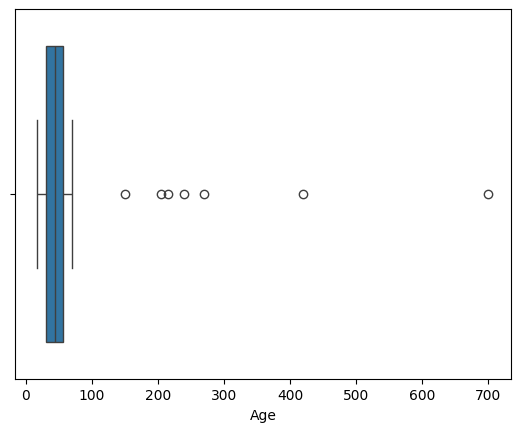

In [34]:
# Përdorimi i paketës seaborn për ti paraqitur Outliers
sns.boxplot(df['Age'], orient='h')


- Largimi i Outliers me metodën Z-Score

In [40]:
# Gjetja e limiteve
upper_limit = df['Age'].mean() + 3*df['Age'].std()
lower_limit = df['Age'].mean() - 3*df['Age'].std()
print('Limiti i sipërm:', upper_limit)
print('Limiti i poshtëm:', lower_limit)

upper limit: 105.77592085161783
lower limit: -16.663907661480735


In [39]:
# Gjetja e Outliers
df.loc[(df['Age'] > upper_limit) | (df['Age'] < lower_limit)]

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3944,3900,150.0,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly
3945,3900,240.0,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly
3946,3900,420.0,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly
3947,3900,215.0,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly
3948,3900,205.0,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly
3949,3900,270.0,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly
3950,3900,700.0,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly


In [41]:
# Largimi i të dhënave që janë paraqitur si Outliers
new_df = df.loc[(df['Age'] <= upper_limit) & (df['Age'] >= lower_limit)]
print('Para largimit të Outliers:', len(df))
print('Pas largimit të Outliers:',len(new_df))
print('Outliers:', len(df)-len(new_df))

before removing outliers: 3911
after removing outliers: 3904
outliers: 7
